In [1]:
from transformers import pipeline
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

/mnt/e/university/master/text_analysis-labs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-uk")

/mnt/e/university/master/text_analysis-labs/venv/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [3]:
translator(['I had an excellent breakfast.', 'Good food in Ukraine.'])

[{'translation_text': 'Я добре поснідала.'},
 {'translation_text': 'Добра їжа в Україні.'}]

In [4]:
imdb = pd.read_csv('./data/imdb.csv')

imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
imdb_ukr = imdb.copy()

imdb_ukr

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<Axes: >

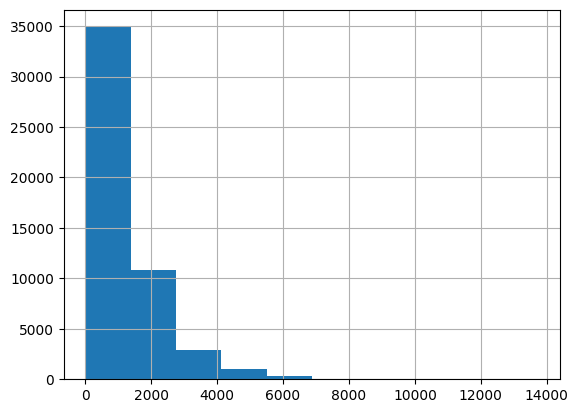

In [6]:
imdb_ukr.review.apply(lambda x: len(x)).hist()

In [14]:
imdb_ukr.review.apply(lambda x: ' '.join(x.split(' ')[:512]))

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [19]:
tokens = translator.tokenizer(imdb_ukr.review.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=512)

In [20]:
tokens.keys(), tokens['input_ids'].shape

(dict_keys(['input_ids', 'attention_mask']), torch.Size([50000, 512]))

In [21]:
ds = TensorDataset(tokens['input_ids'], tokens['attention_mask'])

dl = DataLoader(ds, batch_size=64, shuffle=False)

In [22]:
next(iter(dl))[0].shape

torch.Size([64, 512])

In [ ]:
results = []
for batch in tqdm(dl):
    outs = translator.model.generate(input_ids=batch[0], attention_mask=batch[1])
    results += [translator.tokenizer.decode(t, skip_special_tokens=True) for t in translated]

  0%|                                                                                                                     | 0/782 [00:00<?, ?it/s]